## 天文常数计算
### mycons.py 
#### 共包含4个函数atand、sind、cosd、kconstants
#### 正弦sind、余弦cosd、反正切atand的（弧度转角度）计算函数
#### kconstants（角频率、天文初位相、订正角、交点因子）调和常数计算（亦可手动查表）

In [ ]:
import numpy as np
import math

def atand(x):
    return np.arctan(x)* 180 / np.pi 
def sind(x):
    return np.sin(x * np.pi / 180)
def cosd(x):
    return np.cos(x * np.pi / 180)

def kconstants(cons):
    ## 杜德逊数
    ## 13分潮
    k= np.array([[2,-2,2,0,0,0],       #km2 -----%半日
        [2,0,0,0,0,0],                 #ks2 
        [2,-3,2,1,0,0],                #kn2
        [2,0,2,0,0,0],                 #kk2 
        [1,0,1,0,0,90],                #kk1 -----%全日
        [1,-2,1,0,0,270],              #ko1 
        [1,0,-1,0,0,270],              #kp1 
        [1,-3,1,1,0,270],              #kq1 
        [4,-4,4,0,0,0],                #km4 -----%浅水
        [4,-2,2,0,0,0],                #kms4 
        [6,-6,6,0,0,0],                #km6 
        [0,0,1,0,0,0],                 #ksa -----%长周期
        [0,0,2,0,0,0]])                #kssa 
    
    ## 天文参数
    n  = cons[0]; Y  = cons[1]; 
    L = 0
    for i in range(1900,Y):   # 1900年至*年的所有闰年
        if i%4==0 and i%100!=0 or i%400==0:
            L+=1  
    D1 = 0;  
    t  = np.linspace(0,n-1,n, endpoint=True,dtype=int).reshape(1,n)
    #--------------------------------------------------------------------------------------------------------------------
    s  = 277.025+129.38481*(Y-1900)+13.1764*(D1+L+t/24)
    h  = 280.190-0.23872*(Y-1900)+0.98565*(D1+L+t/24)
    p  = 334.385+40.66249*(Y-1900)+0.11140*(D1+L+t/24)
    ps = 281.221+0.01718*(Y-1900)+0.000047*(D1+L+t/24)
    N  = 259.157-19.32818*(Y-1900)-0.05295*(D1+L+t/24)
    #--------------------------------------------------------------------------------------------------------------------
    Ss = 0.54901653;Sh = 0.04106864;Sp = 0.00464183;
    Sps = 0.000001961;SN = 0.00220641;
    Sigma = np.zeros((1,13))
    V0 = np.zeros((1,13))
    ## Sigma and V0
    for i in range(13):
        Sigma[0,i]= k[i,0]*15+k[i,1]*Ss+k[i,2]*Sh+k[i,3]*Sp+k[i,4]*Sps
        V0[0,i]= k[i,1]*s[:,0]+k[i,2]*h[:,0]+k[i,3]*p[:,0]+k[i,4]*ps[:,0]+k[i,5]

    #-------------------------------------------------------zqy----------------------------------------------------------
    #M2
    A1 = 1-0.03733*cosd(N)+0.00052*cosd(2*N)+0.00058*cosd(2*p)+0.00021*cosd(2*p-N) 
    B1 = -0.03733*sind(N)+0.00052*sind(2*N)+0.00058*sind(2*p)+0.00021*sind(2*p-N) 
    #S2
    A2 = 1+0.00225*cosd(N)+0.00014*cosd(2*p)
    B2 = 0.00225*sind(N)+0.00014*sind(2*p) 
    #N2
    A3= 1-0.03733*cosd(N)+0.00052*cosd(2*N)+0.00081*cosd(p-ps)-0.00385*cosd(2*p-2*N)
    B3= -0.03733*sind(N)+0.00052*sind(2*N)-0.00081*sind(p-ps)+0.00385*sind(2*p-2*N) 
    #K2
    A4 = 1+0.28518*cosd(N)+0.03235*cosd(2*N)
    B4 = -0.31074*sind(N)-0.03235*sind(2*N)
    #%K1
    A5 = 1+0.11573*cosd(N)-0.00281*cosd(2*N)+0.00019*cosd(2*p-N) 
    B5 = -0.15539*sind(N)+0.00303*sind(2*N)-0.00019*sind(2*p-N) 
    #O1
    A6 = 1+0.18852*cosd(N)-0.00578*cosd(2*N)-0.00645*cosd(2*p)-0.00103*cosd(2*p-N)+0.00019*cosd(2*p+N)
    B6 = 0.18852*sind(N)-0.00578*sind(2*N)-0.00645*sind(2*p)-0.00103*sind(2*p-N)+0.00019*sind(2*p+N) 
    #P1
    A7= 1-0.01123*cosd(N)+0.00080*cosd(2*N)-0.00040*cosd(2*ps)-0.00148*cosd(2*p)-0.00029*cosd(2*p-N)
    B7= -0.01123*sind(N)+0.00080*sind(2*N)-0.00040*sind(2*ps)-0.00148*sind(2*p)-0.00029*sind(2*p-N)
    #Q1
    A8 = 1+0.18844*cosd(N)-0.00568*cosd(2*N)-0.00277*cosd(2*p)-0.00388*cosd(2*p-2*N)+0.00083*cosd(p-ps)-0.00069*cosd(2*p-3*N)
    B8 = 0.18844*sind(N)-0.00568*sind(2*N)-0.00277*sind(2*p)+0.00388*sind(2*p-2*N)-0.00083*sind(p-ps)+0.00069*sind(2*p-3*N)
    A0 = np.concatenate((A1,A2,A3,A4,A5,A6,A7,A8),axis=0)
    B0 = np.concatenate((B1,B2,B3,B4,B5,B6,B7,B8),axis=0) 
    ## f and u
    f= np.sqrt(A0*A0+B0*B0)
    u= atand(B0/A0)
    #M4
    f9 = f[0]*f[0].reshape(1,n); u9 = 2*u[0].reshape(1,n)
    #MS4
    f10 = f[0]*f[1].reshape(1,n); u10 = u[0]+u[1].reshape(1,n)
    #M6
    f11 = f[0]*f[0]*f[0] .reshape(1,n); u11 = 3*u[0].reshape(1,n)
    #Sa
    f12 = np.ones((1,n)).reshape(1,n); u12 = np.zeros((1,n)).reshape(1,n)
    #Ssa
    f13 = np.ones((1,n)).reshape(1,n); u13 = np.zeros((1,n)).reshape(1,n)
    #--------------------------------------------------------------------------------------------------------------------
    f = np.concatenate((f,f9,f10,f11,f12,f13), axis=0)
    u = np.concatenate((u,u9,u10,u11,u12,u13), axis=0)#订正角
    f = f.T;
    u = u.T;
    return Sigma,V0,u,f

## 调和分析
### mytide.py
#### 仅包含1个函数 tideQ(data,Sigma,V0,u,f)
#### 需要在天文常数计算完毕后，传参进入

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mycons import kconstants,atand,sind,cosd

def tideQ(data,Sigma,V0,u,f):
    m,n = data.shape
    Y_obs = data.reshape((m*n,1))
    ## 迭代运算
    phase0=np.zeros((m*n,13))
    for t in range(m*n):
        for i in range(13):
            phase0[t,i] = Sigma[:,i]*t+V0[:,i]+u[t,i]; #相角
    e1 = cosd(phase0);e2 = sind(phase0);
    C = f*e1;S = f*e2; 
    Q = np.ones((1,m*n))
    for i in range(13):
        Q = np.concatenate((Q,C[:,i].reshape(1,m*n)), axis=0)
        Q = np.concatenate((Q,S[:,i].reshape(1,m*n)), axis=0)   
    X = np.dot(np.linalg.inv(np.dot(Q,Q.T)),np.dot(Q,Y_obs))  
    length = X.shape[0]
    h0 = X[0];#平均水位
    A = X[1::2];B = X[2::2];
    #--------------------------------------------------------------------------
    H = np.sqrt(np.float64(A*A+B*B))#振幅
    g = np.zeros((1,13))            #迟角
    for i in range(13):
        if A[i,0]>0 :
            g[:,i] = atand(np.float64(B[i,0]/A[i,0]))
        elif A[i,0]==0:
            if B[i,0]>0:
                g[:,i] = 90 
            elif B==0:
                g[:,i] = 0
            else:
                g[:,i] = -90
        else:
            g[:,i] = atand(np.float64(B[i,0]/A[i,0]))-180 

    g = g+8*Sigma;#转换东八区
    g = (g+360)%360;#角度转至0-360
    
    ## 分潮展开式
    y_13 = np.zeros((13,m*n))
    for t in range(m*n):
        for i in range(13):
            y_13[i,t] = f[t,i]*H[i,0]*cosd(Sigma[0,i]*(t+8)+V0[0,i]+u[t,i]-g[0,i]); 
    
    #四个主要半日潮M2、S2、N2、K2
    y_M2  = y_13[0,:];y_S2  = y_13[1,:];y_N2  = y_13[2,:];y_K2  = y_13[3,:];
    #四个主要全日潮K1、O1、P1、Q1
    y_K1  = y_13[4,:];y_O1  = y_13[5,:];y_P1  = y_13[6,:];y_Q1  = y_13[7,:];
    #浅水分潮M4、MS4、M6
    y_M4  = y_13[8,:];y_MS4 = y_13[9,:];y_M6  = y_13[10,:];
    #长周期分潮Sa、Ssa
    y_Sa  = y_13[11,:];y_Ssa = y_13[12,:];
    Y_13= h0[0]+y_M2+y_S2+y_N2+y_K2+y_K1+y_O1+y_P1+y_Q1+y_M4+y_MS4+y_M6+y_Sa+y_Ssa
    Y_other= Y_obs-Y_13.reshape(n*m,1) 
    y_13 = y_13.T
    return Y_obs,Y_13,Y_other,y_13

### main.py
#### 主函数，统一调用mycons.py与mytide.py,并绘图

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mytide import tideQ
from mycons import kconstants,atand,sind,cosd

（1）读取数据+提取数据信息

In [2]:
data = pd.read_csv(r'2.csv',encoding='gbk').values[:,-12:]
Num = data.shape[0]*data.shape[1]
year = 1996
cons = [Num,year]

（2）潮汐调和参数计算

In [3]:
Sigma,V0,u,f = kconstants(cons)

（3）13分潮调和分析

In [4]:
Y_obs,Y_13,Y_other,y_13 = tideQ(data,Sigma,V0,u,f)

       平均水位/mm   3896.124405
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
       <分潮 >     <迟角/度>              <振幅/mm> 
       < M2  >     [253.6240618]         [1870.87145911]          
       < S2  >     [294.23189461]        [679.81614313]          
       < N2  >     [230.96381631]        [328.40635099]          
       < K2  >     [291.34005591]        [180.79476489]          
       < K1  >     [219.10256272]        [300.40370667]          
       < O1  >     [180.91122962]        [229.56764556]          
       < P1  >     [216.33424324]        [92.71610188]          
       < Q1  >     [158.60707418]        [44.4537277]          
       < M4  >     [277.81658068]        [32.46641371]          
       < MS4 >     [346.68339444]        [31.0513516]          
       < M6  >     [356.75681385]        [7.37822386]          
       < Sa  >     [180.44595446]        [158.79280947]          
       < Ssa >     [35.17905645]         [63.61269691]          
       
      运行结束!


（4）作图

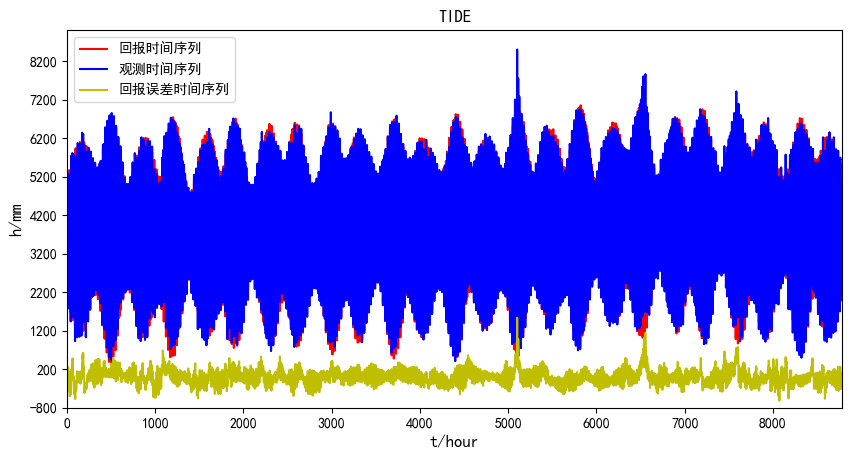

In [38]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10,5), dpi=100)
plt.plot(Y_13,'r',label='回报时间序列')
plt.plot(Y_obs,'b',label='观测时间序列')
plt.plot(Y_other,'y',label='回报误差时间序列')
plt.xlim((0, Num))
plt.ylim((-800, 9000))
plt.xticks(np.arange(0, Num, 1000),fontsize=10)
plt.yticks(np.arange(-800, 9000, 1000),fontsize=10)
plt.ylabel('h/mm',fontsize=12)
plt.xlabel('t/hour',fontsize=12) 
plt.legend()

plt.title('TIDE',fontsize=12) 
plt.show()

### 各分潮绘图，过密，截之！

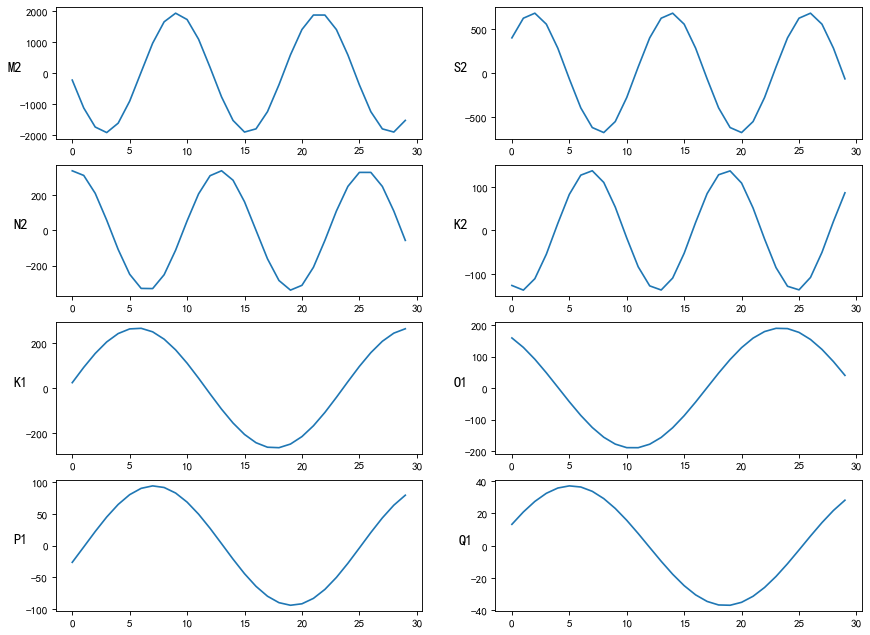

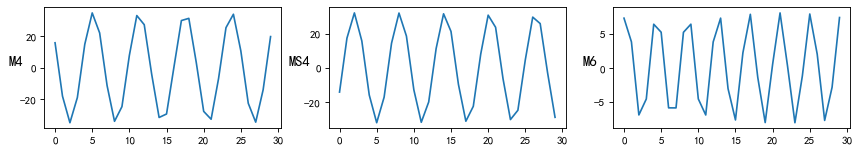

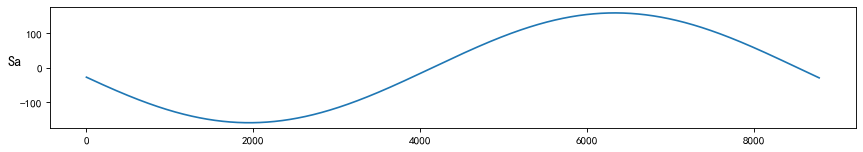

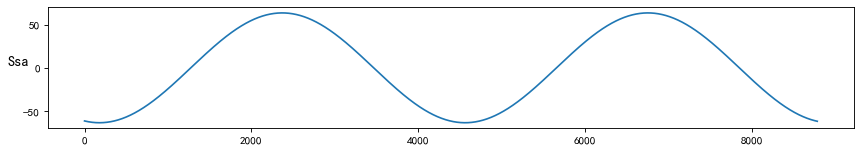

In [81]:
tit = ['M2','S2','N2','K2','K1','O1','P1','Q1','M4','MS4','M6','Sa','Ssa']
plt.figure(figsize=(13,10), dpi=80)
for i in range(1,9):
    plt.subplot(4,2,i)
    plt.plot(y_13[0:30,i-1])
    plt.ylabel(tit[i-1],fontsize=13,rotation=0)
plt.show()
plt.figure(figsize=(13,2), dpi=80)
for i in range(1,4):
    plt.subplot(1,3,i)
    plt.plot(y_13[0:30,i+7])
    plt.ylabel(tit[i+7],fontsize=13,rotation=0)
plt.show()
plt.figure(figsize=(13,2), dpi=80)
plt.plot(y_13[:,11])
plt.ylabel(tit[11],fontsize=13,rotation=0)
plt.show()
plt.figure(figsize=(13,2), dpi=80)
plt.plot(y_13[:,12])
plt.ylabel(tit[12],fontsize=13,rotation=0)
plt.show()

In [ ]:
全部代码最好明确调用关系后使用，或前往下载后调用，